# IMPORTANT LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
import plotly.express as px
import numpy as np
from datetime import date
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
%matplotlib inline

# LOAD DATASET

In [3]:
df = pd.read_csv('water_potability.csv')
df.head().T

,0,1,2,3,4
ph,NaN,3.716080,8.099124,8.316766,9.092223
Hardness,204.890455,129.422921,224.236259,214.373394,181.101509
Solids,20791.318981,18630.057858,19909.541732,22018.417441,17978.986339
Chloramines,7.300212,6.635246,9.275884,8.059332,6.546600
Sulfate,368.516441,NaN,NaN,356.886136,310.135738
Conductivity,564.308654,592.885359,418.606213,363.266516,398.410813
Organic_carbon,10.379783,15.180013,16.868637,18.436524,11.558279
Trihalomethanes,86.990970,56.329076,66.420093,100.341674,31.997993
Turbidity,2.963135,4.500656,3.055934,4.628771,4.075075
Potability,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


*DESCRIPTION OF EACH COLUMN*
- ph: pH of 1. water (0 to 14).
- Hardness: Capacity of water to precipitate soap in mg/L.
- Solids: Total dissolved solids in ppm.
- Chloramines: Amount of Chloramines in ppm.
- Sulfate: Amount of Sulfates dissolved in mg/L.
- Conductivity: Electrical conductivity of water in μS/cm.
- Organic_carbon: Amount of organic carbon in ppm.
- Trihalomethanes: Amount of Trihalomethanes in μg/L.
- Turbidity: Measure of light emiting property of water in NTU.
- Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

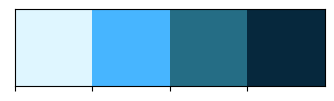

In [5]:
# Determine the colors which we will use in the whole project
colors = ['#DFF6FF','#47B5FF','#256D85',"#06283D"]
sns.palplot(colors)

In [6]:
# Uniform the columns and records to avoid the inconsistencies
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head().T

,0,1,2,3,4
ph,NaN,3.716080,8.099124,8.316766,9.092223
hardness,204.890455,129.422921,224.236259,214.373394,181.101509
solids,20791.318981,18630.057858,19909.541732,22018.417441,17978.986339
chloramines,7.300212,6.635246,9.275884,8.059332,6.546600
sulfate,368.516441,NaN,NaN,356.886136,310.135738
conductivity,564.308654,592.885359,418.606213,363.266516,398.410813
organic_carbon,10.379783,15.180013,16.868637,18.436524,11.558279
trihalomethanes,86.990970,56.329076,66.420093,100.341674,31.997993
turbidity,2.963135,4.500656,3.055934,4.628771,4.075075
potability,0.000000,0.000000,0.000000,0.000000,0.000000


# Impute Missing Values with MEAN

In [7]:
nan_data_numerical = round(100*(df.isna().sum())/(len(df.index)), 2).sort_values(ascending = False).to_frame()

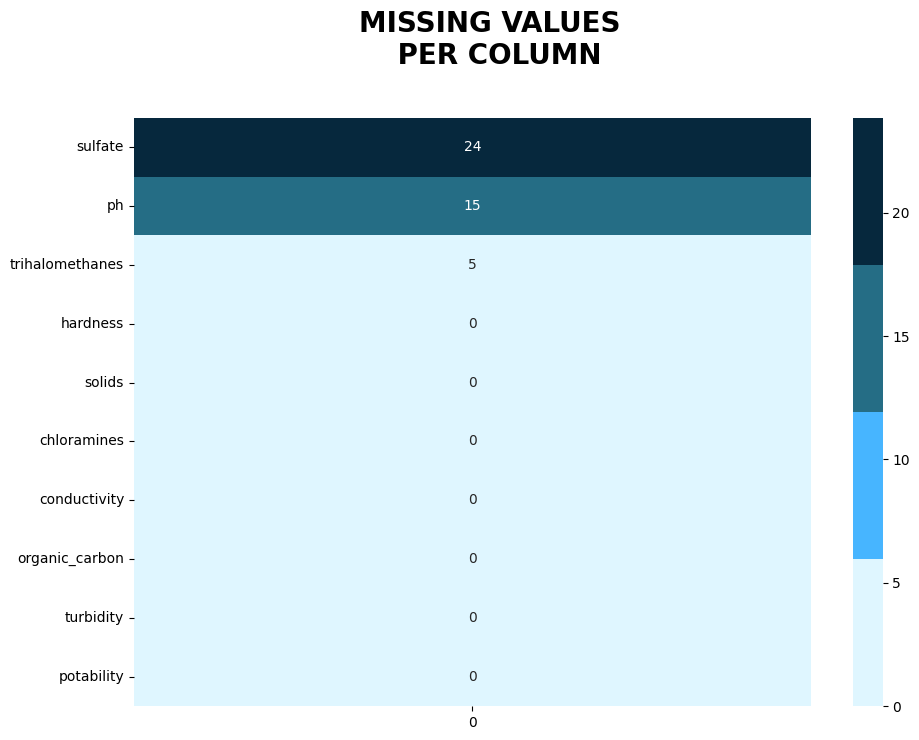

In [8]:
fig, axs = plt.subplots(1,1, figsize=(10,7.5))
plt1 = sns.heatmap(nan_data_numerical, annot = True, cmap = colors, ax = axs)
#axs.set_title('Numerical Columns\n',fontweight = 'bold',fontsize=15)
plt.suptitle('MISSING VALUES \n PER COLUMN\n', fontsize=20, fontweight = 'bold')
plt.tight_layout()

In [9]:
data = df.copy()

In [10]:
list_nan_features = list(nan_data_numerical[nan_data_numerical[0] > 0 ].index)
for col in list_nan_features:
    data[col] = data[col].replace(np.nan, data[col].median())

In [11]:
df_potability_compare = pd.DataFrame(data.potability.value_counts().values, index=['Not Potability','Potability'],columns = ['count'])
df_potability_compare

,count
Not Potability,1998
Potability,1278


In [12]:

today = date.today()

fig = px.pie(df_potability_compare.sort_values('count',ascending=False),values='count',names=df_potability_compare.sort_values('count',ascending=False).index,hole=0.4,opacity=0.9,
             color_discrete_sequence=[colors[3],colors[1]])


# Add annotation
fig.add_annotation(x=0.15, y=0.7, text=(f"We can see that the data<br>showing an imbalanced dataset"), yanchor='bottom', showarrow=True, arrowhead=1, arrowsize=1
    , arrowwidth=2, arrowcolor=colors[3], ax=-100, ay=-50, font=dict(size=20, color=colors[2], family="monospace"), align="left", bordercolor=colors[3], borderwidth=2
    , bgcolor=colors[0], opacity=0.7)
#Add footnote
fig.add_annotation(
    text = (f"@budisumandra / {today}"),showarrow=False,x=0.15,y=-0.15,xref='paper',yref='paper',xanchor='left',yanchor='bottom',xshift=-1,yshift=-5,
    font=dict(size=12,color=colors[2]),align='left')

fig.add_annotation(text='Potability Composition<br>for Next Feature Analysis', x=0.5,y=0.5,showarrow=False,\
                   font_size=14,opacity=0.7,font_family='Gravitas One')

fig.update_layout(font_family='Gravitas One',title=dict(text='Potability Composition',x=0.5,y=0.98,
                font=dict(color=colors[3],size=20)),legend=dict(x=0.405,y=-0.08,orientation='h',traceorder='reversed'), hoverlabel=dict(bgcolor=colors[3]))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

In [13]:
df_corr_coef = pd.DataFrame(data.corrwith(data.potability),columns = ['corr_coef_value']).sort_values(ascending=False, by='corr_coef_value')
df_corr_coef

,corr_coef_value
potability,1.000000
solids,0.033743
chloramines,0.023779
trihalomethanes,0.006887
turbidity,0.001581
ph,-0.003014
conductivity,-0.008128
hardness,-0.013837
sulfate,-0.020476
organic_carbon,-0.030001


## SPLIT DATASET

In [14]:
df_train_full, df_test = train_test_split(data,test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.3, random_state=1)

In [15]:
print('{}>>{}|{}|{}'.format(data.shape,df_train.shape, df_test.shape,df_val.shape))

(3276, 10)>>(1834, 10)|(656, 10)|(786, 10)


In [16]:
y_train = df_train.potability.values
y_val = df_val.potability.values

del df_train['potability']
del df_val['potability']

# LOGISTIC REGRESSION

## FEATURE ENGINEERING
**ONE-HOT ENCODING**

In [17]:
# Make a function named "train" with parameter "df" and "y" which can be reproduceable to another dataframe
def train(df,y):
    dv = DictVectorizer(sparse=False)
    cat = df.to_dict(orient='records')
    dv.fit(cat)
    X = dv.transform(cat)
    model = LogisticRegression(solver='liblinear', random_state=1)
    model.fit(X,y)
    return dv, model

In [18]:
def predict(df, dv, model):
    cat = df.to_dict(orient='records')
    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:,1]
    
    return y_pred

In [19]:
dv, model = train(df_train,y_train)

In [20]:
y_pred = predict(df_val, dv, model)

In [21]:
thresholds = np.linspace(0,1,11)
for t in thresholds:
    potability = y_pred >= t
    acc = accuracy_score(y_val, potability)
    print('t = %0.2f || acc = %0.3f' % (t, acc))

t = 0.00 || acc = 0.364
t = 0.10 || acc = 0.364
t = 0.20 || acc = 0.364
t = 0.30 || acc = 0.363
t = 0.40 || acc = 0.545
t = 0.50 || acc = 0.636
t = 0.60 || acc = 0.636
t = 0.70 || acc = 0.636
t = 0.80 || acc = 0.636
t = 0.90 || acc = 0.636
t = 1.00 || acc = 0.636


In [22]:
potability = y_pred >= 0.5

In [23]:
print('Output: %0.3f' % (y_val == potability).mean())

Output: 0.636


# DECISION TREE

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
df_train_full, df_test = train_test_split(data,test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.3, random_state=1)

In [26]:
df_train.potability.value_counts()

0    1125
1     709
Name: potability, dtype: int64

In [27]:
y_train = (df_train.potability == 1).values
y_val = (df_val.potability == 1).values

del df_train['potability']
del df_val['potability']

In [28]:
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient = 'records')

In [29]:
dv = DictVectorizer(sparse=False)

In [30]:
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [31]:
for depth in [1,2,3,4,5,6,10,12,15,17,19,20,None]:
    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth,auc))

   1 -> 0.508
   2 -> 0.535
   3 -> 0.537
   4 -> 0.576
   5 -> 0.569
   6 -> 0.580
  10 -> 0.585
  12 -> 0.588
  15 -> 0.620
  17 -> 0.605
  19 -> 0.580
  20 -> 0.585
None -> 0.586


In [32]:
 for m in [10,15,17,19]:
        print('depth: %s' % m)
        for s in [1,5,10,15,20,50,100,200]:
            dt = DecisionTreeClassifier(max_depth = m, min_samples_leaf=s)
            dt.fit(X_train, y_train)
            y_pred = dt.predict_proba(X_val)[:,1]
            auc = roc_auc_score(y_val, y_pred)
            print('%s -> %.3f' % (s,auc))

depth: 10
1 -> 0.588
5 -> 0.591
10 -> 0.608
15 -> 0.606
20 -> 0.607
50 -> 0.562
100 -> 0.558
200 -> 0.551
depth: 15
1 -> 0.610
5 -> 0.626
10 -> 0.629
15 -> 0.597
20 -> 0.600
50 -> 0.564
100 -> 0.558
200 -> 0.551
depth: 17
1 -> 0.595
5 -> 0.597
10 -> 0.623
15 -> 0.600
20 -> 0.593
50 -> 0.564
100 -> 0.558
200 -> 0.551
depth: 19
1 -> 0.585
5 -> 0.610
10 -> 0.622
15 -> 0.596
20 -> 0.590
50 -> 0.564
100 -> 0.558
200 -> 0.551


#### THE BEST AUC = 0.633
***depth =  15, min_samples_leaf = (1,5,10)***

## RANDOM FOREST

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
aucs = []
for i in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=i, random_state = 3)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s --> %.3f' % (i,auc))
    
    aucs.append(auc)

10 --> 0.608
20 --> 0.634
30 --> 0.634
40 --> 0.649
50 --> 0.650
60 --> 0.654
70 --> 0.653
80 --> 0.654
90 --> 0.651
100 --> 0.654
110 --> 0.654
120 --> 0.656
130 --> 0.657
140 --> 0.658
150 --> 0.660
160 --> 0.659
170 --> 0.657
180 --> 0.658
190 --> 0.659
200 --> 0.661


Text(0, 0.5, 'AUC')

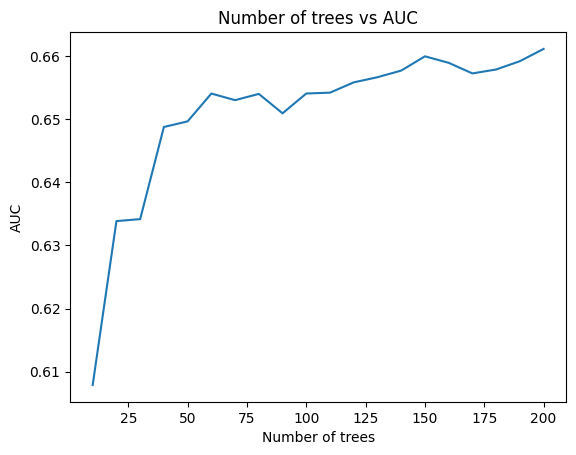

In [35]:
plt.plot(range(10,201,10), aucs)
plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

In [36]:
all_aucs = {}
for depth in [15,17,19]:
    print('depth : %s' % depth)
    aucs = []
    for i in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=i, max_depth = depth, random_state = 3)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s --> %.3f' % (i,auc))
        aucs.append(auc)
    all_aucs[depth] = aucs
    print()


depth : 15
10 --> 0.611
20 --> 0.625
30 --> 0.616
40 --> 0.626
50 --> 0.633
60 --> 0.637
70 --> 0.640
80 --> 0.648
90 --> 0.645
100 --> 0.653
110 --> 0.655
120 --> 0.656
130 --> 0.657
140 --> 0.659
150 --> 0.661
160 --> 0.658
170 --> 0.658
180 --> 0.656
190 --> 0.658
200 --> 0.659

depth : 17
10 --> 0.618
20 --> 0.624
30 --> 0.639
40 --> 0.644
50 --> 0.642
60 --> 0.645
70 --> 0.648
80 --> 0.650
90 --> 0.649
100 --> 0.650
110 --> 0.653
120 --> 0.653
130 --> 0.656
140 --> 0.656
150 --> 0.658
160 --> 0.657
170 --> 0.657
180 --> 0.658
190 --> 0.658
200 --> 0.659

depth : 19
10 --> 0.590
20 --> 0.616
30 --> 0.622
40 --> 0.628
50 --> 0.641
60 --> 0.646
70 --> 0.645
80 --> 0.652
90 --> 0.647
100 --> 0.652
110 --> 0.653
120 --> 0.657
130 --> 0.655
140 --> 0.658
150 --> 0.662
160 --> 0.661
170 --> 0.661
180 --> 0.660
190 --> 0.659
200 --> 0.661



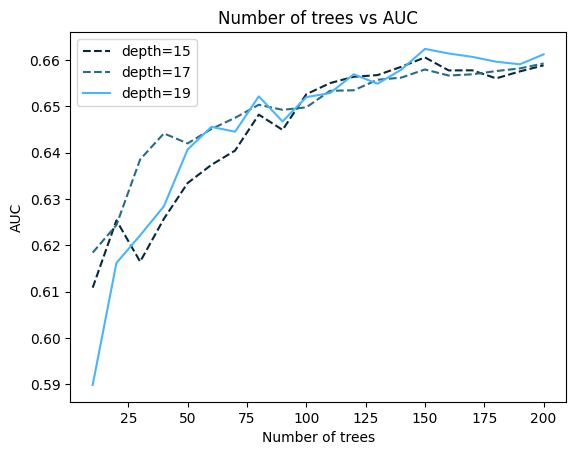

In [37]:
num_trees = list(range(10,201,10))
plt.plot(num_trees, all_aucs[15],label = 'depth=15',color=colors[3], linestyle='dashed')
plt.plot(num_trees, all_aucs[17],label = 'depth=17',color=colors[2], linestyle='dashed')
plt.plot(num_trees, all_aucs[19],label = 'depth=19',color=colors[1], linestyle='solid')
plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')
plt.legend()

In [38]:
all_aucs = {}
for m in [1,5,10]:
    print('min_samples_leaf : %s' % m)
    aucs = []
    for i in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=i, max_depth = 19,min_samples_leaf=m, random_state = 3)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s --> %.3f' % (i,auc))
        aucs.append(auc)
    all_aucs[m] = aucs
    print()

min_samples_leaf : 1
10 --> 0.590
20 --> 0.616
30 --> 0.622
40 --> 0.628
50 --> 0.641
60 --> 0.646
70 --> 0.645
80 --> 0.652
90 --> 0.647
100 --> 0.652
110 --> 0.653
120 --> 0.657
130 --> 0.655
140 --> 0.658
150 --> 0.662
160 --> 0.661
170 --> 0.661
180 --> 0.660
190 --> 0.659
200 --> 0.661

min_samples_leaf : 5
10 --> 0.601
20 --> 0.633
30 --> 0.642
40 --> 0.642
50 --> 0.638
60 --> 0.646
70 --> 0.642
80 --> 0.642
90 --> 0.641
100 --> 0.644
110 --> 0.641
120 --> 0.643
130 --> 0.641
140 --> 0.644
150 --> 0.646
160 --> 0.648
170 --> 0.646
180 --> 0.648
190 --> 0.647
200 --> 0.649

min_samples_leaf : 10
10 --> 0.597
20 --> 0.621
30 --> 0.626
40 --> 0.633
50 --> 0.635
60 --> 0.638
70 --> 0.637
80 --> 0.640
90 --> 0.643
100 --> 0.643
110 --> 0.645
120 --> 0.645
130 --> 0.644
140 --> 0.645
150 --> 0.645
160 --> 0.645
170 --> 0.646
180 --> 0.648
190 --> 0.649
200 --> 0.649



The best value AUC:  0.662
----------------------------------------


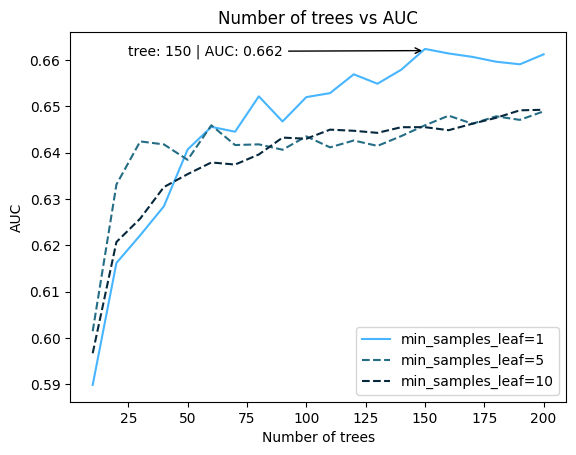

In [39]:
max_values_each_key = map(max,list(all_aucs.values()))
print("The best value AUC: ",round(max(max_values_each_key),3))
print("--"*20)
num_trees = list(range(10,201,10))
plt.plot(num_trees, all_aucs[1],label = 'min_samples_leaf=1',color=colors[1], linestyle='solid')
plt.plot(num_trees, all_aucs[5],label = 'min_samples_leaf=5',color=colors[2], linestyle='dashed')
plt.plot(num_trees, all_aucs[10],label = 'min_samples_leaf=10',color=colors[3], linestyle='dashed')
#plt.plot((150,0.6623), scaley = False,color = 'b',label = 'highest auc')
#plt.axhline(.6623,xmin=0,xmax=0.7,linestyle='--')
plt.annotate("tree: 150 | AUC: 0.662", xy=(150, 0.662), xytext=(25,0.661),arrowprops=dict(arrowstyle="->"))
plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')
plt.legend()

### THE BEST AUC = 0.662
***depth = 19, min_samples_leaf = 1, tree = 150***

In [40]:
max_values_each_key = map(max,list(all_aucs.values()))
a = print("The best value AUC: ",round(max(max_values_each_key),3))
print(a)
print("--"*20)
num_trees = list(range(10,201,10))

The best value AUC:  0.662
None
----------------------------------------


In [41]:
import pickle

In [42]:
with open('water_potability.bin', 'wb') as f_out:
    pickle.dump((dv, rf), f_out)